# Model Evaluations and Predictions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Load the model

In [3]:
model = load_model('binary_model.h5')

In [4]:
# load the test set for prediction
test_dir = 'Face Mask Dataset/Test'
image_gen = ImageDataGenerator(rescale=1./255)
test_generator = image_gen.flow_from_directory(test_dir,
                                        target_size=(150,150),
                                        batch_size=80,
                                        seed=42,
                                        shuffle=False,
                                        class_mode='binary')
prediction = model.predict_classes(test_generator)
y_true = test_generator.labels

Found 992 images belonging to 2 classes.


## Evaluation on model

In [5]:
confusion_matrix(y_true, prediction)

array([[478,   5],
       [  2, 507]])

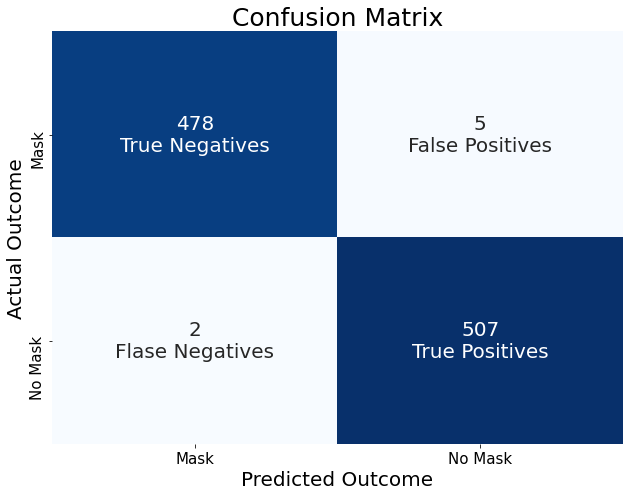

In [6]:
# plotting confusion matrix
plt.figure(figsize=(25,7))
plt.subplot(131)
ax = sns.heatmap(confusion_matrix(test_generator.labels, prediction.round()),
            annot = True, annot_kws={"size":20}, fmt="d",cmap = "Blues",cbar=False)
cmlabels = ['True Negatives', "False Positives",
               'Flase Negatives', "True Positives"]
for i,t in enumerate(ax.texts):
  t.set_text(t.get_text() + "\n" + cmlabels[i])
plt.title('Confusion Matrix', size=25)
plt.xlabel('Predicted Outcome', size=20)
plt.ylabel('Actual Outcome', size=20)
labels = ['Mask', 'No Mask']
ax.set_xticklabels(labels, size=15)
ax.set_yticklabels(labels, size=15)
plt.tight_layout()
plt.show();

In [7]:
print(classification_report(y_true, prediction))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       483
           1       0.99      1.00      0.99       509

    accuracy                           0.99       992
   macro avg       0.99      0.99      0.99       992
weighted avg       0.99      0.99      0.99       992



## Prediction on unseen images

In [8]:
from keras.preprocessing import image
# file path
mask_file = 'Face Mask Dataset/Test/WithMask/190.png'
nomask_file = 'Face Mask Dataset/Test/WithoutMask/84.png'
test_mask_img = 'test_img/test_mask _1.jpg'
test_nomask_img = 'test_img/test_nomask_1.jpeg'

0: with mask <br>
1: without mask

In [9]:
def mask_detector(file, model):
    """
    The function returns the prediction of mask.
    
    parameters: 
        file: image file path 
        model: mask detector model
    
    output: 
        prediction: if the person has mask or not
        show image
    """
    img = image.load_img(file, target_size=(150,150))
    new_img = image.img_to_array(img)
    new_img = np.expand_dims(new_img, axis=0)
    new_img = new_img/255
    
    labels = {0:"Mask", 1:"No Mask"}
    prediction_class = model.predict_classes(new_img)[0][0]
    prediction = labels[prediction_class]
    
    print(f'the person has {prediction}')
    plt.imshow(img)

the person has Mask


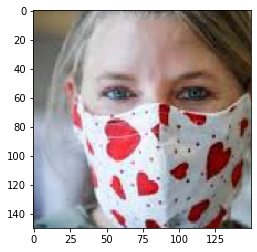

In [10]:
mask_detector(mask_file, model)

the person has No Mask


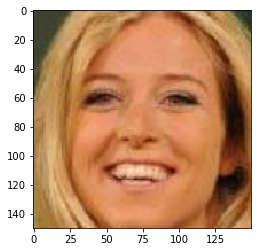

In [11]:
mask_detector(nomask_file, model)

the person has Mask


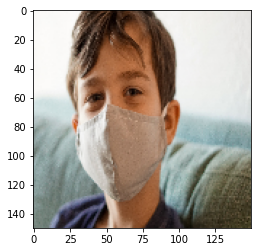

In [12]:
mask_detector(test_mask_img, model)

the person has No Mask


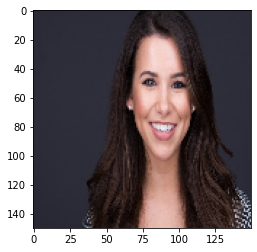

In [13]:
mask_detector(test_nomask_img, model)

the person has No Mask


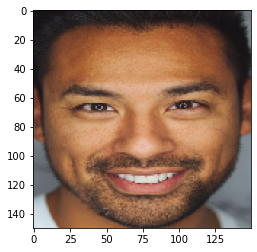

In [14]:
mask_detector("test_img/test_nomask_2.png", model)

the person has Mask


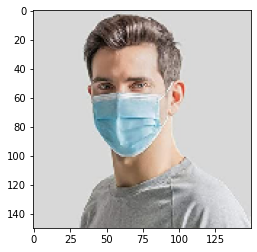

In [15]:
mask_detector("test_img/test_mask_2.jpg", model)

the person has No Mask


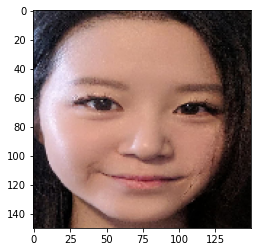

In [16]:
mask_detector("test_img/test_nomask_3.png", model)

## Map Files to Prediction Results

In [17]:
filenames = [x for x in test_generator.filenames]
label = [x for x in y_true]
predict = [x[0] for x in prediction]

import pandas as pd
df = pd.DataFrame(list(zip(filenames, label, predict)), columns=['Filenames', 'Label', 'Predict'])
df.head()

,Filenames,Label,Predict
0,WithMask/1163.png,0,1
1,WithMask/1174.png,0,0
2,WithMask/1175.png,0,0
3,WithMask/1203.png,0,0
4,WithMask/1361.png,0,0


In [18]:
# function to add "Outcome" column
def predict_outcome(row):
    if (row['Label'] == 0) & (row['Predict'] == 0):
        return "TN"
    elif (row['Label'] == 0) & (row['Predict'] == 1):
        return "FP"
    elif (row['Label'] == 1) & (row['Predict'] == 1):
        return "TP"
    elif (row['Label'] == 1) & (row['Predict'] == 0):
        return "FN"

# applying function
df['Outcome'] = df.apply (lambda row: predict_outcome(row), axis=1)

In [56]:
# Sanity check
df.sample(5)

,Filenames,Label,Predict,Outcome
73,WithMask/86.png,0,0,TN
748,WithoutMask/3945.png,1,1,TP
460,WithMask/Augmented_854_5503218.png,0,0,TN
826,WithoutMask/4597.png,1,1,TP
675,WithoutMask/3012.png,1,1,TP


In [58]:
df.Outcome.value_counts()

TP    507
TN    478
FP      5
FN      2
Name: Outcome, dtype: int64

### False Positive 
Predict = No Mask <br>
Actual = With Mask

In [20]:
df[df["Outcome"]=="FP"]

,Filenames,Label,Predict,Outcome
0,WithMask/1163.png,0,1,FP
48,WithMask/45.png,0,1,FP
379,WithMask/Augmented_689_9677847.png,0,1,FP
448,WithMask/Augmented_824_6606851.png,0,1,FP
482,WithMask/Augmented_99_5504654.png,0,1,FP


the person has No Mask


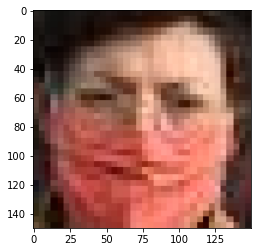

In [21]:
mask_detector('Face Mask Dataset/Test/WithMask/1163.png', model)

the person has No Mask


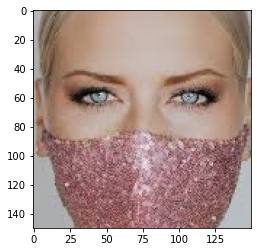

In [22]:
mask_detector('Face Mask Dataset/Test/WithMask/45.png', model)

the person has No Mask


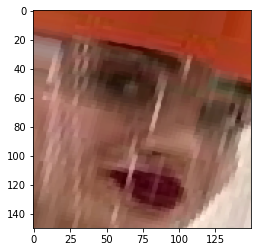

In [23]:
mask_detector('Face Mask Dataset/Test/WithMask/Augmented_689_9677847.png', model)

the person has No Mask


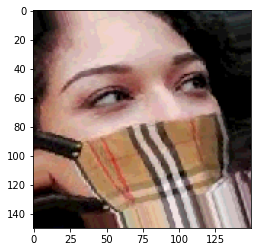

In [24]:
mask_detector('Face Mask Dataset/Test/WithMask/Augmented_824_6606851.png', model)

the person has No Mask


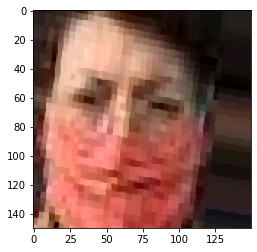

In [25]:
mask_detector('Face Mask Dataset/Test/WithMask/Augmented_99_5504654.png', model)

### False Negative
Predict = With Mask <br>
Actual = No Mask

In [26]:
df[df["Outcome"]=="FN"]

,Filenames,Label,Predict,Outcome
694,WithoutMask/3372.png,1,0,FN
869,WithoutMask/51.png,1,0,FN


the person has Mask


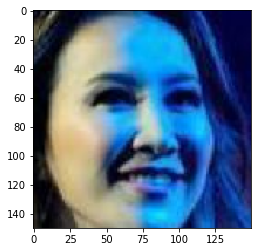

In [28]:
mask_detector('Face Mask Dataset/Test/WithoutMask/3372.png', model)

the person has Mask


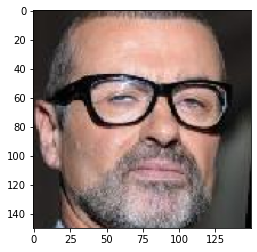

In [29]:
mask_detector('Face Mask Dataset/Test/WithoutMask/51.png', model)

### True Positive
Predict = No Mask <br>
Acutal = No Mask

In [39]:
df[df["Outcome"]=="TP"].sample(5)

,Filenames,Label,Predict,Outcome
782,WithoutMask/422.png,1,1,TP
542,WithoutMask/1639.png,1,1,TP
555,WithoutMask/1834.png,1,1,TP
501,WithoutMask/1203.png,1,1,TP
593,WithoutMask/2131.png,1,1,TP


the person has No Mask


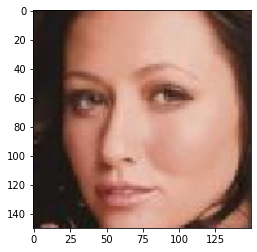

In [37]:
mask_detector('Face Mask Dataset/Test/WithoutMask/1014.png', model)

the person has No Mask


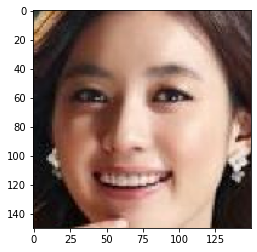

In [45]:
mask_detector('Face Mask Dataset/Test/WithoutMask/1203.png', model)

### True Negative
Predict = With Mask <br>
Acutal = With Mask

In [51]:
df[df["Outcome"]=="TN"].sample(5)

,Filenames,Label,Predict,Outcome
69,WithMask/796.png,0,0,TN
251,WithMask/Augmented_443_9987555.png,0,0,TN
287,WithMask/Augmented_511_6421814.png,0,0,TN
241,WithMask/Augmented_423_5573198.png,0,0,TN
346,WithMask/Augmented_619_458230.png,0,0,TN


the person has Mask


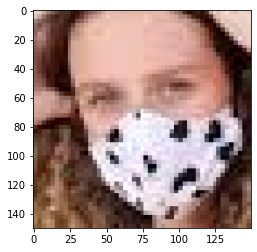

In [47]:
mask_detector('Face Mask Dataset/Test/WithMask/1821.png', model)

the person has Mask


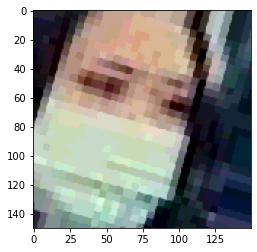

In [48]:
mask_detector('Face Mask Dataset/Test/WithMask/Augmented_522_9697933.png', model)

the person has Mask


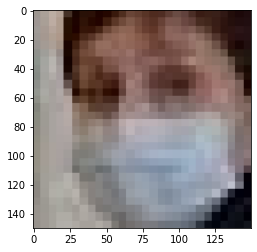

In [52]:
mask_detector('Face Mask Dataset/Test/WithMask/796.png', model)

the person has Mask


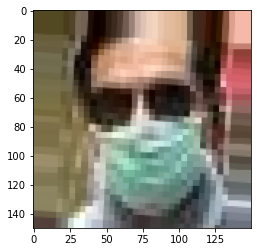

In [53]:
mask_detector('Face Mask Dataset/Test/WithMask/Augmented_443_9987555.png', model)